In [462]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt

In [463]:

try:
    conexao = sql3.connect('../../database/Pokemon.db')
    cursor = conexao.cursor()
    pokemons=pd.read_sql('SELECT Type1, Type2,Generation FROM pokemon;',conexao)
    generation=pd.read_sql('SELECT * FROM generation;',conexao)
    types=pd.read_sql('SELECT id, type FROM types;',conexao)
    qtd=len(pokemons)
except Exception as e:
    print(f"Erro ao acessar o banco de dados: {e}")

In [464]:
def porcentagem1e2(df:pd.DataFrame=pokemons,type:pd.DataFrame=types):
    json={}
    for x in type['id'].unique():
        porcentagem = len(df.loc[(df['Type1'] == x) | (df['Type2'] == x)])
        if porcentagem>0:
            type_name = type.loc[type['id'] == x, 'type'].values[0]
            json[type_name]=porcentagem
    return json

In [465]:
def porcentagem1(df:pd.DataFrame=pokemons,type:pd.DataFrame=types):
    json={}
    for x in type['id'].unique():
        porcentagem = len(df.loc[(df['Type1'] == x)])
        if porcentagem>0:
            type_name = type.loc[type['id'] == x, 'type'].values[0]
            json[type_name]=porcentagem
    return json


In [466]:
def porcentagem2(df:pd.DataFrame=pokemons,type:pd.DataFrame=types):
    json={}
    for x in type['id'].unique():
        porcentagem = len(df.loc[(df['Type2'] == x)])
        if porcentagem>0:
            type_name = type.loc[type['id'] == x, 'type'].values[0]
            json[type_name]=porcentagem
    return json

In [467]:
def pega_gen(gen:list=None):
    if not gen:
        gen=generation
    else:
        try:
            gen=generation.loc[generation['Generation'].isin(gen)]
        except Exception as e:
            print(f'gen inválida erro {e}')
            return {}
    id=gen['id'].unique()
    df=pokemons.loc[pokemons['Generation'].isin(id)]
    return df

In [468]:
def pega_type_gen(gen:list=generation['Generation'].unique(),type:list=types['type'].unique()):
    if gen==[]:
        gen=generation['Generation'].unique()
    json={}
    type=types.loc[types['type'].isin(type)]
    for x in gen:
        for_gen=pega_gen([x])
        soma=0
        filtro=porcentagem1e2(for_gen,type)
        for y in filtro:
            soma+=filtro[y]
        json[x]=soma
    return json


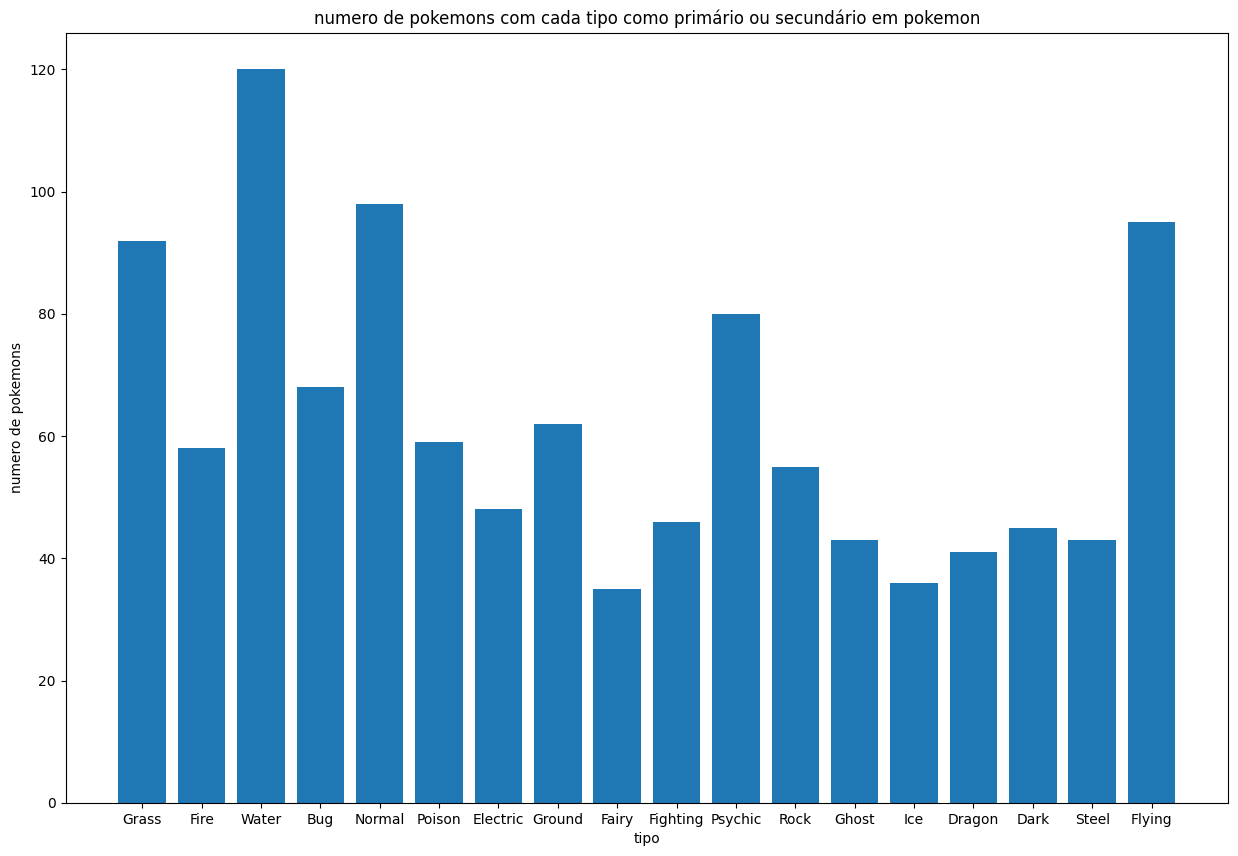

In [469]:
json=porcentagem1e2()
totais=[]
nomes=[]

for x in json:
    totais.append(json[x])
    nomes.append(x)
# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('numero de pokemons com cada tipo como primário ou secundário em pokemon')
plt.xlabel('tipo')
plt.ylabel('numero de pokemons')
plt.xticks(fontsize=10)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=10)

# Mostrar o gráfico
plt.show()

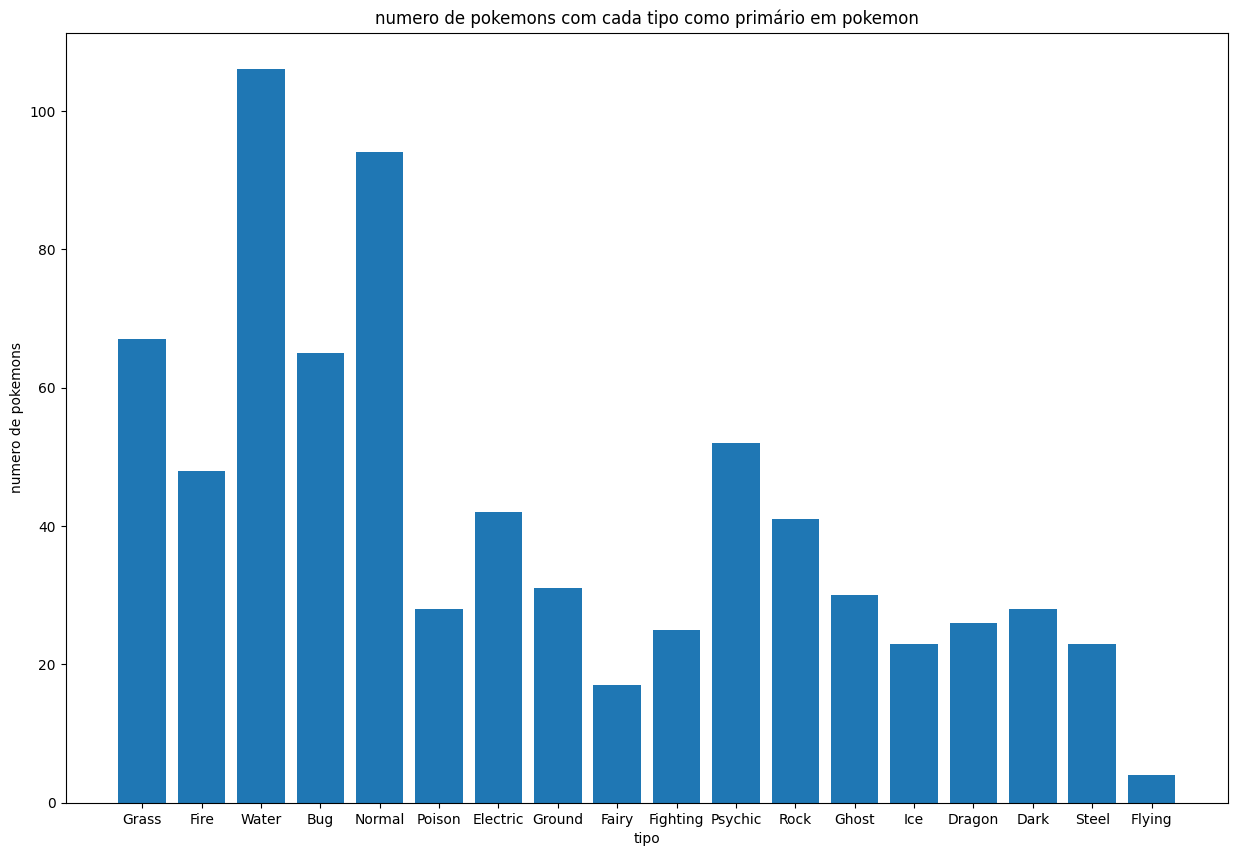

In [470]:
json=porcentagem1()
totais=[]
nomes=[]

for x in json:
    totais.append(json[x])
    nomes.append(x)
# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('numero de pokemons com cada tipo como primário em pokemon')
plt.xlabel('tipo')
plt.ylabel('numero de pokemons')
plt.xticks(fontsize=10)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=10)

# Mostrar o gráfico
plt.show()

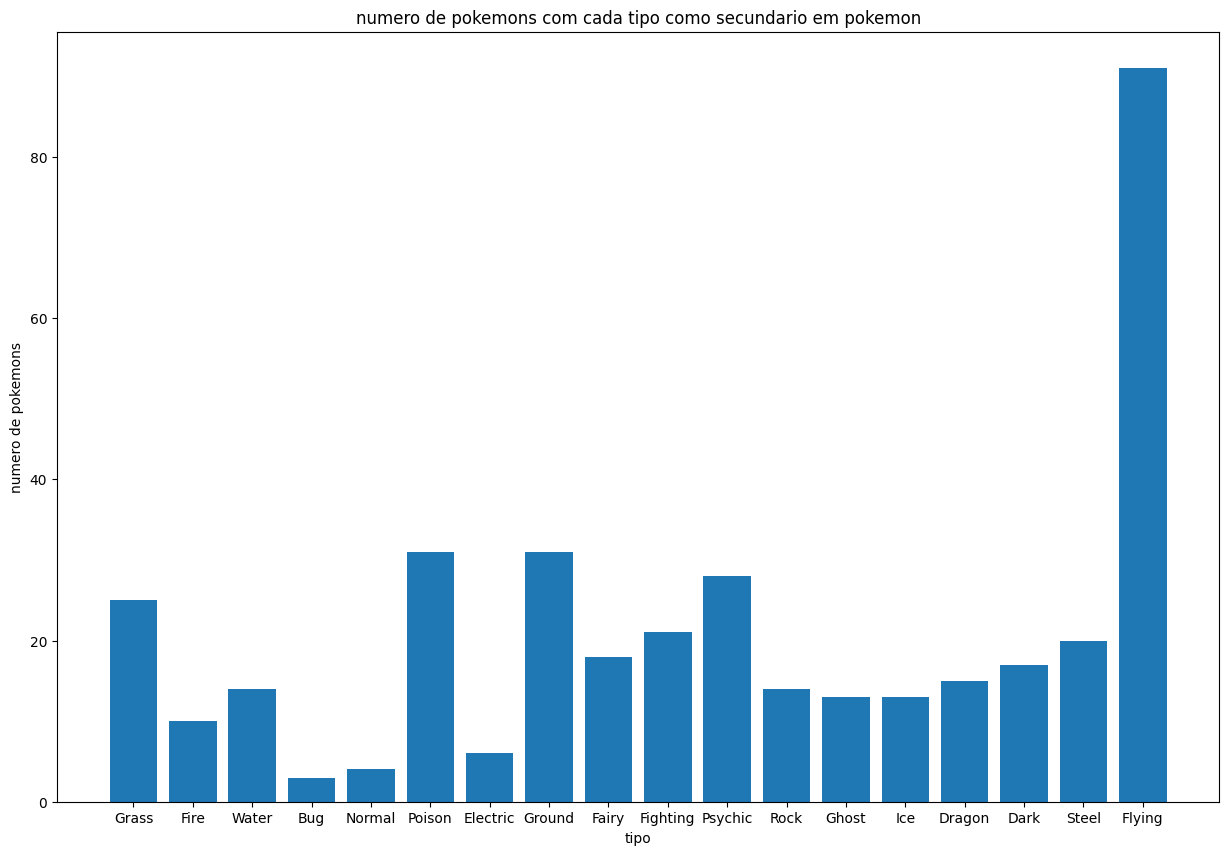

In [471]:
json=porcentagem2()
totais=[]
nomes=[]

for x in json:
    totais.append(json[x])
    nomes.append(x)
# Criar gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('numero de pokemons com cada tipo como secundario em pokemon')
plt.xlabel('tipo')
plt.ylabel('numero de pokemons')
plt.xticks(fontsize=10)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=10)

# Mostrar o gráfico
plt.show()

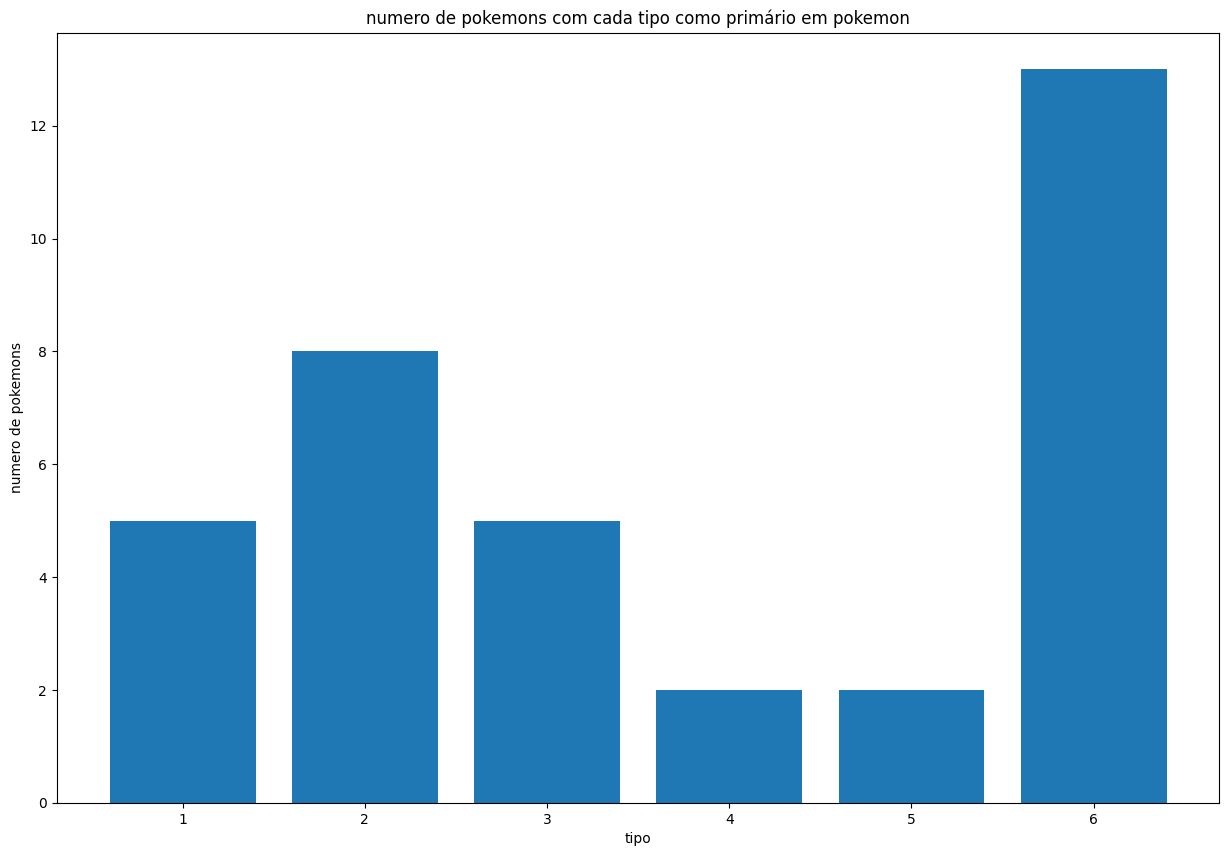

In [472]:
json = pega_type_gen([], ['Fairy'])
chaves = list(json.keys())
valores = list(json.values()) 

plt.figure(figsize=(15, 10))
plt.bar(chaves, valores)

# Adicionar título e rótulos aos eixos
plt.title('numero de pokemons com cada tipo como primário em pokemon')
plt.xlabel('tipo')
plt.ylabel('numero de pokemons')
plt.xticks(fontsize=10)  # Tamanho da fonte para os rótulos do eixo X
plt.yticks(fontsize=10)

# Mostrar o gráfico
plt.show()